In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [2]:
#this is for population_literacy_area
data_pop_lit_area = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/Datatrained_Academy-/main/Capstone_Project/POPULATION_AREA_LITERACY_DATA.csv')
data_pop_lit_area.head()


,State/UT,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,UTTAR PRADESH,"19,98,12,341",20.23%,"2,40,928",829,912,67.68
1,MAHARASHTRA,"11,23,74,333",15.99%,"3,07,713",365,929,82.34
2,BIHAR,"10,40,99,452",25.42%,"94,163","1,106",918,61.80
3,WEST BENGAL,"9,12,76,115",13.84%,"88,752","1,028",950,76.26
4,ANDHRA PRADESH,"8,45,80,777",10.98%,"2,75,045",308,993,67.02


In [3]:
#link = https://web.archive.org/web/20140104213453/http://www.shareacafe.com/crime-rates-in-indian-state-wise/
#this is for statewise crime rate
url = 'https://raw.githubusercontent.com/Jyotsnajha12345/Datatrained_Academy-/main/Capstone_Project/Crime_rate_statewise.csv'
data_crime = pd.read_csv(url, encoding = 'latin1')  #reading the dataset for zomato csv
data_crime.head()


,State/UT,Murder,Attempt To Commit Murder,C.H. Not,Rape,Kidnapping & Abduction,Dacoity,Preparation And Assembly ForDacoity,Total Crime
0,ANDHRA PRADESH,2808,2229,171,1442,2154,126,7,8937.0
1,ARUNACHAL PRADESH,65,29,2,42,93,13,0,244.0
2,ASSAM,1303,504,48,110%0,3764,305,4,5928.0
3,BIHAR,3198,3327,348,934,4268,556,105,12736.0
4,CHHATTISGARH,1110,747,28,1053,472,68,7,3485.0


In [4]:
crime_lite_data = pd.merge(data_pop_lit_area,data_crime,on='State/UT')
crime_lite_data.head()

,State/UT,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Murder,Attempt To Commit Murder,C.H. Not,Rape,Kidnapping & Abduction,Dacoity,Preparation And Assembly ForDacoity,Total Crime
0,UTTAR PRADESH,"19,98,12,341",20.23%,"2,40,928",829,912,67.68,4951,4653,1454,2042,8500,379,39,22018.0
1,MAHARASHTRA,"11,23,74,333",15.99%,"3,07,713",365,929,82.34,2818,2105,144,110%1,1610%,773,291,6147.1
2,BIHAR,"10,40,99,452",25.42%,"94,163","1,106",918,61.80,3198,3327,348,934,4268,556,105,12736.0
3,WEST BENGAL,"9,12,76,115",13.84%,"88,752","1,028",950,76.26,2109,2242,486,2363,4285,236,939,12660.0
4,ANDHRA PRADESH,"8,45,80,777",10.98%,"2,75,045",308,993,67.02,2808,2229,171,1442,2154,126,7,8937.0


In [5]:
crime_lite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State/UT                             30 non-null     object 
 1   Population                           30 non-null     object 
 2   Increase                             30 non-null     object 
 3   Area(Km2)                            30 non-null     object 
 4   Density                              30 non-null     object 
 5   Sex-Ratio                            30 non-null     int64  
 6   Literacy                             30 non-null     float64
 7   Murder                               30 non-null     object 
 8   Attempt To Commit Murder             30 non-null     int64  
 9   C.H. Not                             30 non-null     int64  
 10  Rape                                 30 non-null     object 
 11  Kidnapping & Abduction            

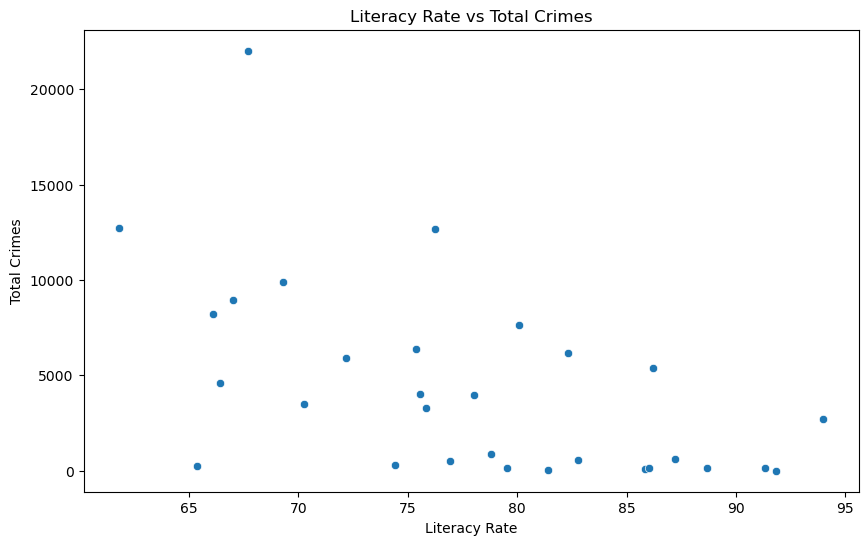

In [6]:
# 2.1 Analysis of Literacy Rate vs Total Crimes

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy', y='Total Crime', data=crime_lite_data)
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.show()



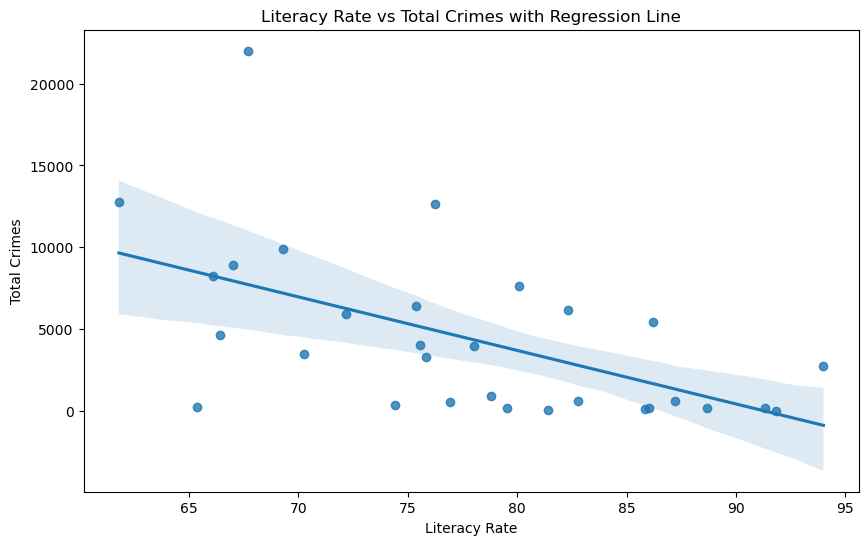

In [7]:
#regression plot

plt.figure(figsize=(10, 6))
sns.regplot(x='Literacy', y='Total Crime', data=crime_lite_data)
plt.title('Literacy Rate vs Total Crimes with Regression Line')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.show()


From the above graph we can see that as the literacy rate increases the crime rate decreases. When The literacy rate was 
something around 50% - 65% the total crimes were 10000 but when literacy rate keeps on increasing and reached 
till 95% the crimes almost came to 2000 and the crimes gradually decreased.
We can say that education has a great impact on crime prevention. With the higher education there
comes the opportunities for employment and personal development, potentially reducing the likelihood 
of people engaging in criminal activities.Education contributes to social capital, factors 
that may determine criminal behavior.Literate communities may have better crime reporting mechanisms and cooperation with 
law enforcement, leading to a higher likelihood of crimes being detected and reported.Examining long-term trends can 
provide insights into the evolving nature of the relationship. Changes in literacy rates and crime rates over time may 
reveal shifting societal dynamics.In conclusion we can say that people should focus more on education to reduce the crime rate.



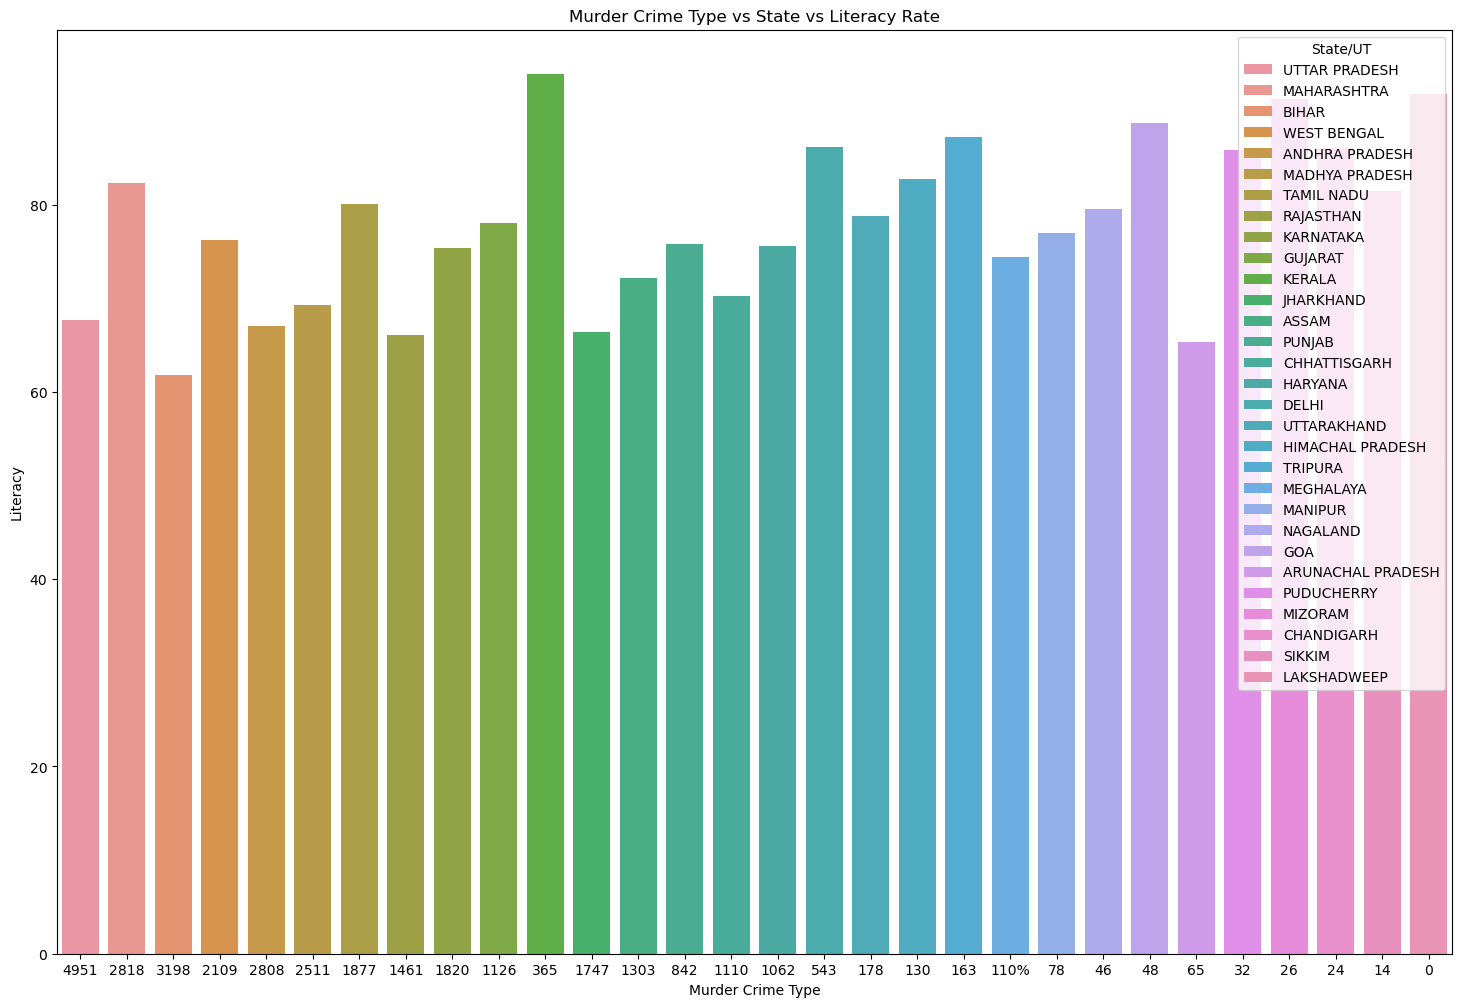

In [8]:
# 2.2 Analysis of the type of crime vs each state vs Literacy rate
plt.figure(figsize=(18, 12))
sns.barplot(x='Murder', y='Literacy', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Murder Crime Type vs State vs Literacy Rate')
plt.xlabel('Murder Crime Type')
plt.ylabel('Literacy')
plt.show()


From the above graph we see that mostly there are less no of crimes involved with the states with higher literacy rate. Here it 
shows that kerala has the highest literacy state followed by goa and maharashtra but when we compare the crime rate, kerala 
counts less while maharashtra has high no of crime. States like Uttar Pradesh, Bihar, Maharashtra, west Bengal Andra Pradesh 
has higher crime rate amongst all.Kerala, with the highest literacy rate, showcases a relatively lower incidence of murders, 
while Maharashtra, despite a high literacy rate, reports a considerable number of crimes. Law should be strictly enforced 
by the government for the states encountering higher murder rates.States with high murder rates may not only grapple with 
increased criminal activity but also face challenges related to the effectiveness of crime prevention and resolution measures.
With this analysis we can conclude that dynamics of murder rates are multifaceted, intertwined with socio-economic conditions,
law enforcement efficacy, and demographic nuances.While high literacy rates are associated with lower murder rates in some 
states, it is clear that education alone is insufficient. A comprehensive approach that addresses socio-economic conditions,
community engagement, and law enforcement efficiency is crucial.
There are several measures needs to be taken to overcome with this such as :
1) Invest in targeted educational programs to improve literacy rates, emphasizing not only basic education but also programs 
focused on conflict resolution, mental health awareness, and community engagement.
2) Enhance community policing efforts to build trust between law enforcement and communities.
3) Implement policies to address socio-economic disparities. 
4) Develop and implement comprehensive crime prevention programs that address the root causes of violence.
5) Identify and focus interventions on areas with higher-than-average murder rates. Tailor policies to address 
 specific issues contributing to crime in those regions.


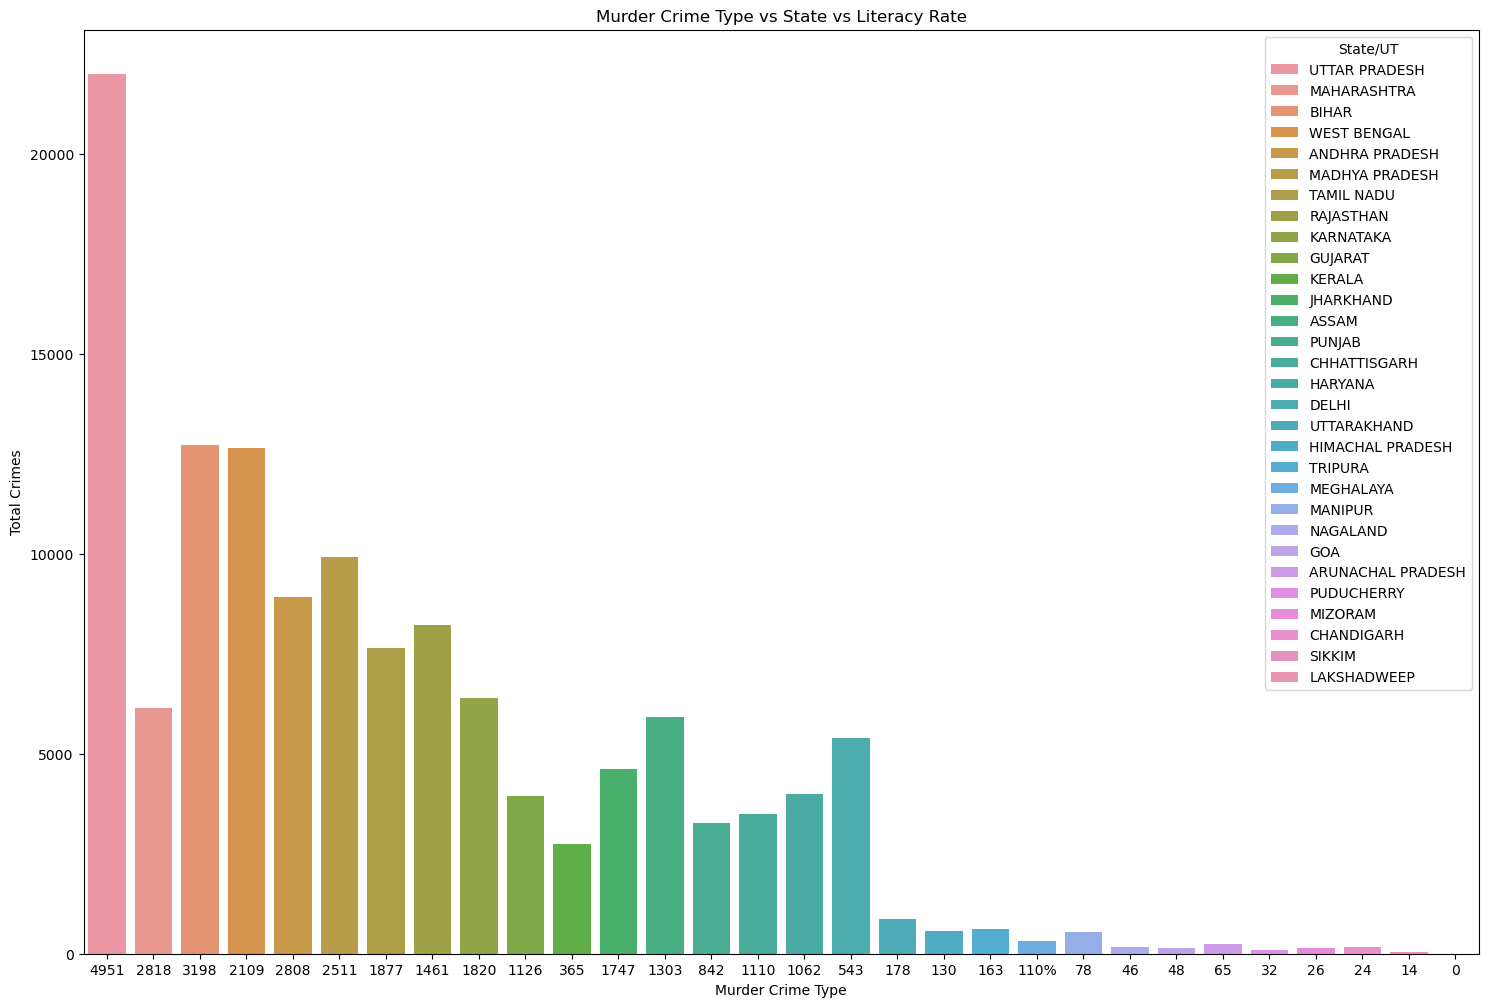

In [9]:
# 2.2 Analysis of the type of crime vs each state vs Total crime
plt.figure(figsize=(18, 12))
sns.barplot(x='Murder', y='Total Crime', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Murder Crime Type vs State vs Literacy Rate')
plt.xlabel('Murder Crime Type')
plt.ylabel('Total Crimes')
plt.show()


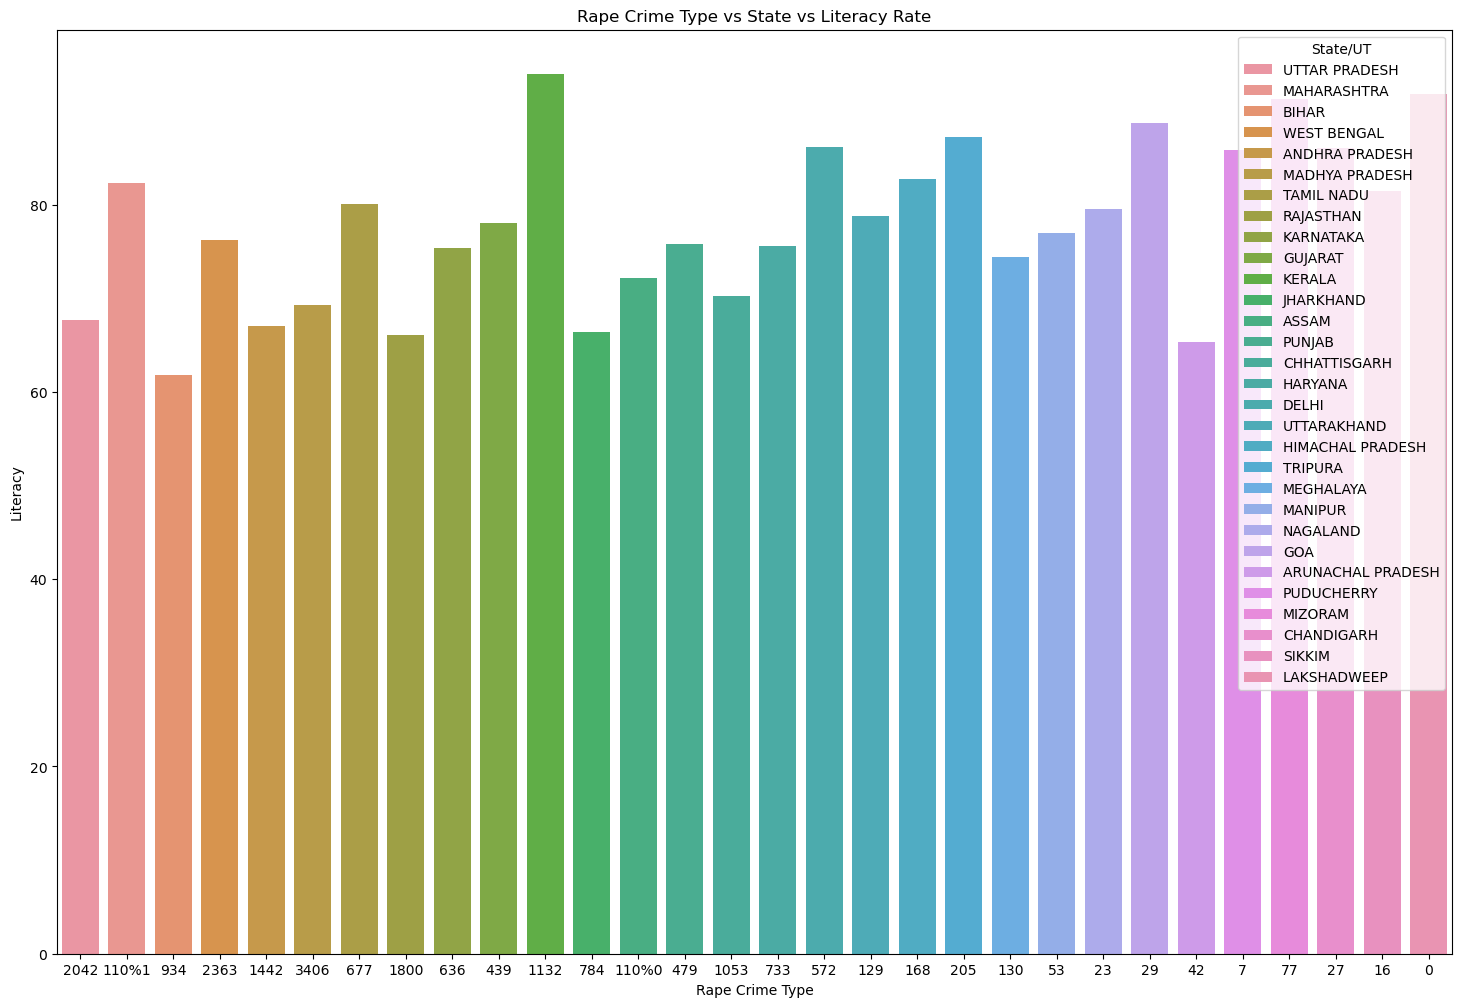

In [10]:
#Stacked bar plot for Analysis of the type of crime vs each state vs Literacy rate

plt.figure(figsize=(18, 12))
sns.barplot(x='Rape', y='Literacy', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Rape Crime Type vs State vs Literacy Rate')
plt.xlabel('Rape Crime Type')
plt.ylabel('Literacy')
plt.show()


From the above graph there are huge number of rape cases involved in Uttar Pradesh. Although kerala having a highest literacy
still have a considerable amount of rape cases.The high incidence of rape cases in Uttar Pradesh emphasizes the urgency of 
implementing focused strategies to address the root causes of such crimes. This may include initiatives aimed at improving 
law enforcement efficiency, enhancing community awareness, and addressing socio-economic disparities that may contribute to
vulnerability.The paradox observed in Kerala, with a high literacy rates and a notable number of rape 
cases, underscores the need for a nuanced understanding of the issue. While education is undoubtedly a 
critical factor in fostering awareness and empowerment, additional considerations such as cultural norms, 
gender dynamics, and law enforcement practices require closer scrutiny.In conclusion, while literacy rates 
may contribute to a broader understanding and prevention of crimes, the persistent occurrence of rape cases 
in states like Uttar Pradesh and Kerala necessitates a holistic and context-specific approach. 
Addressing these challenges requires collaborative efforts, informed policymaking, and a commitment to creating 
safer environments for all citizens.


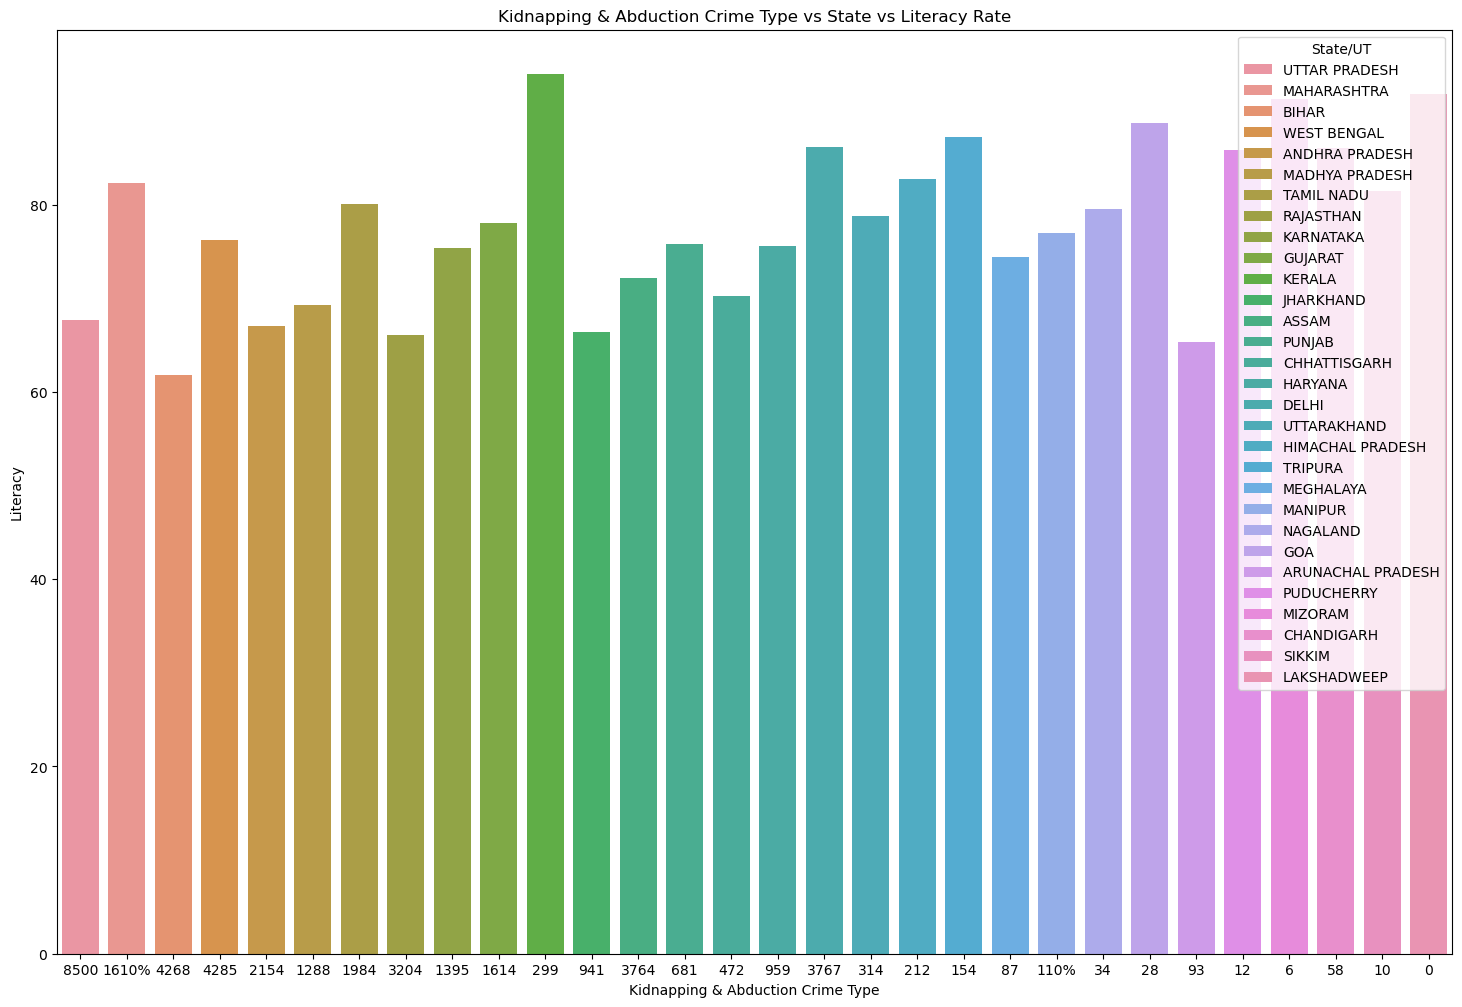

In [11]:
#Stacked bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='Kidnapping & Abduction', y='Literacy', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Kidnapping & Abduction Crime Type vs State vs Literacy Rate')
plt.xlabel('Kidnapping & Abduction Crime Type')
plt.ylabel('Literacy')
plt.show()


From the above graph we can analyze that states like kerala with high literacy rate has less number of Kidnapping & Abduction 
involved while the states like maharashtra with high literacy rate contributes to high crime in Kidnapping & Abduction. 
This correlation suggests that education and literacy may play a pivotal role in mitigating such criminal activities.
Factors such as socio-economic disparities, urbanization, law enforcement effectiveness, and cultural nuances could
also contribute for the variations in the above graph. Addressing underlying socio-economic disparities is crucial.
Utilize technology for surveillance, crime mapping, and early detection. Implementing advanced technologies, such as
facial recognition systems and data analytics, can enhance law enforcement capabilities.


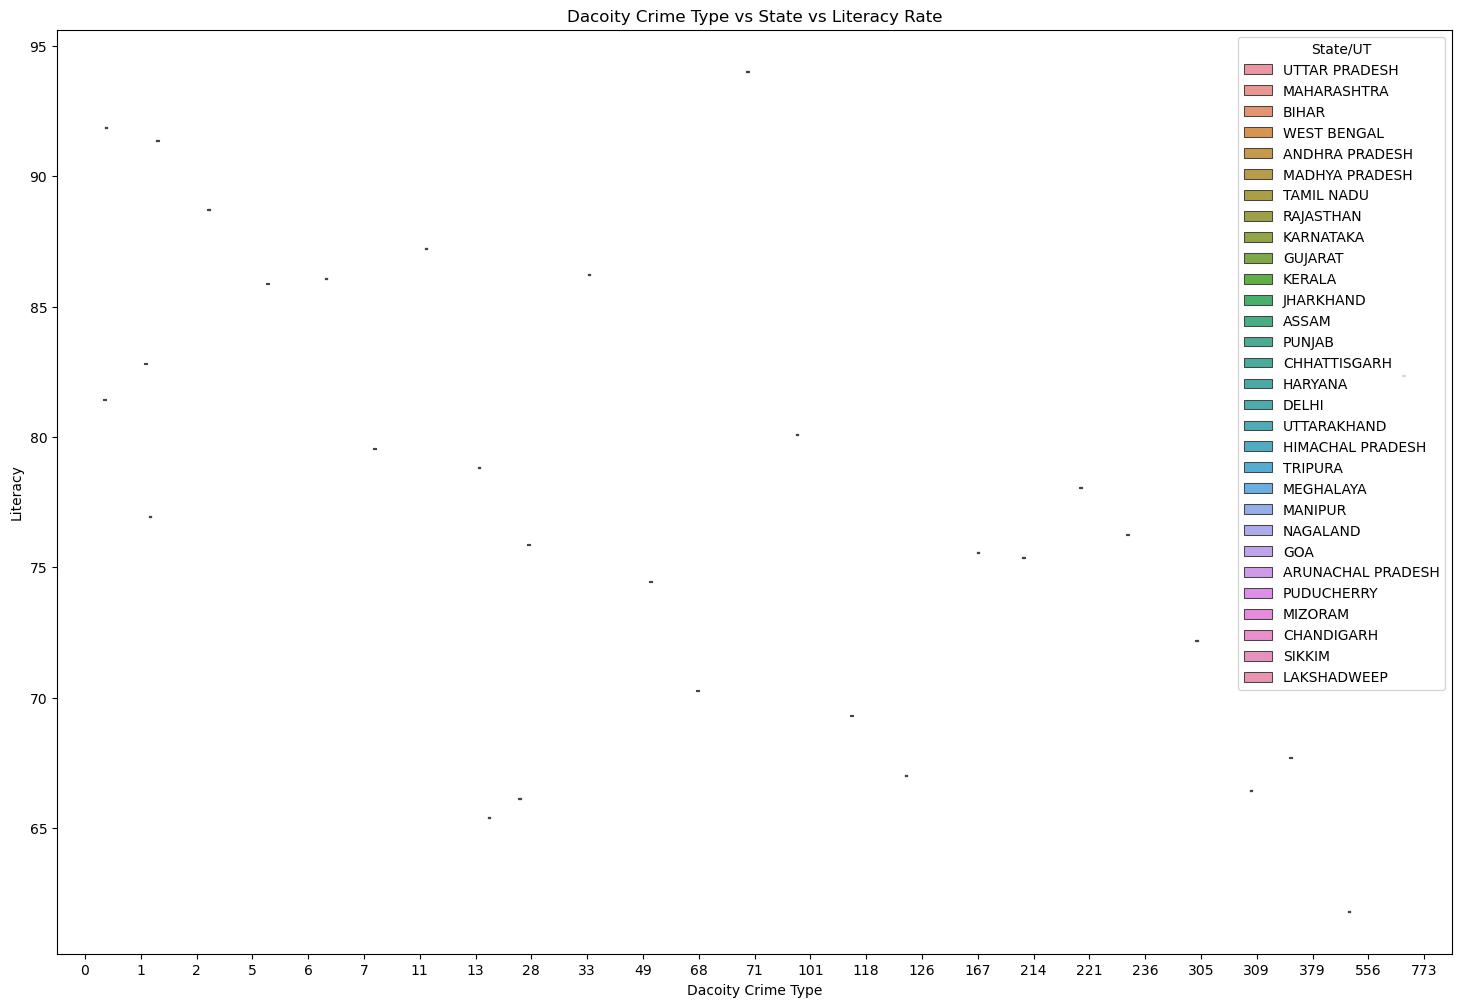

In [12]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='Dacoity', y='Literacy', hue='State/UT', data=crime_lite_data)
plt.title('Dacoity Crime Type vs State vs Literacy Rate')
plt.xlabel('Dacoity Crime Type')
plt.ylabel('Literacy')
plt.show()


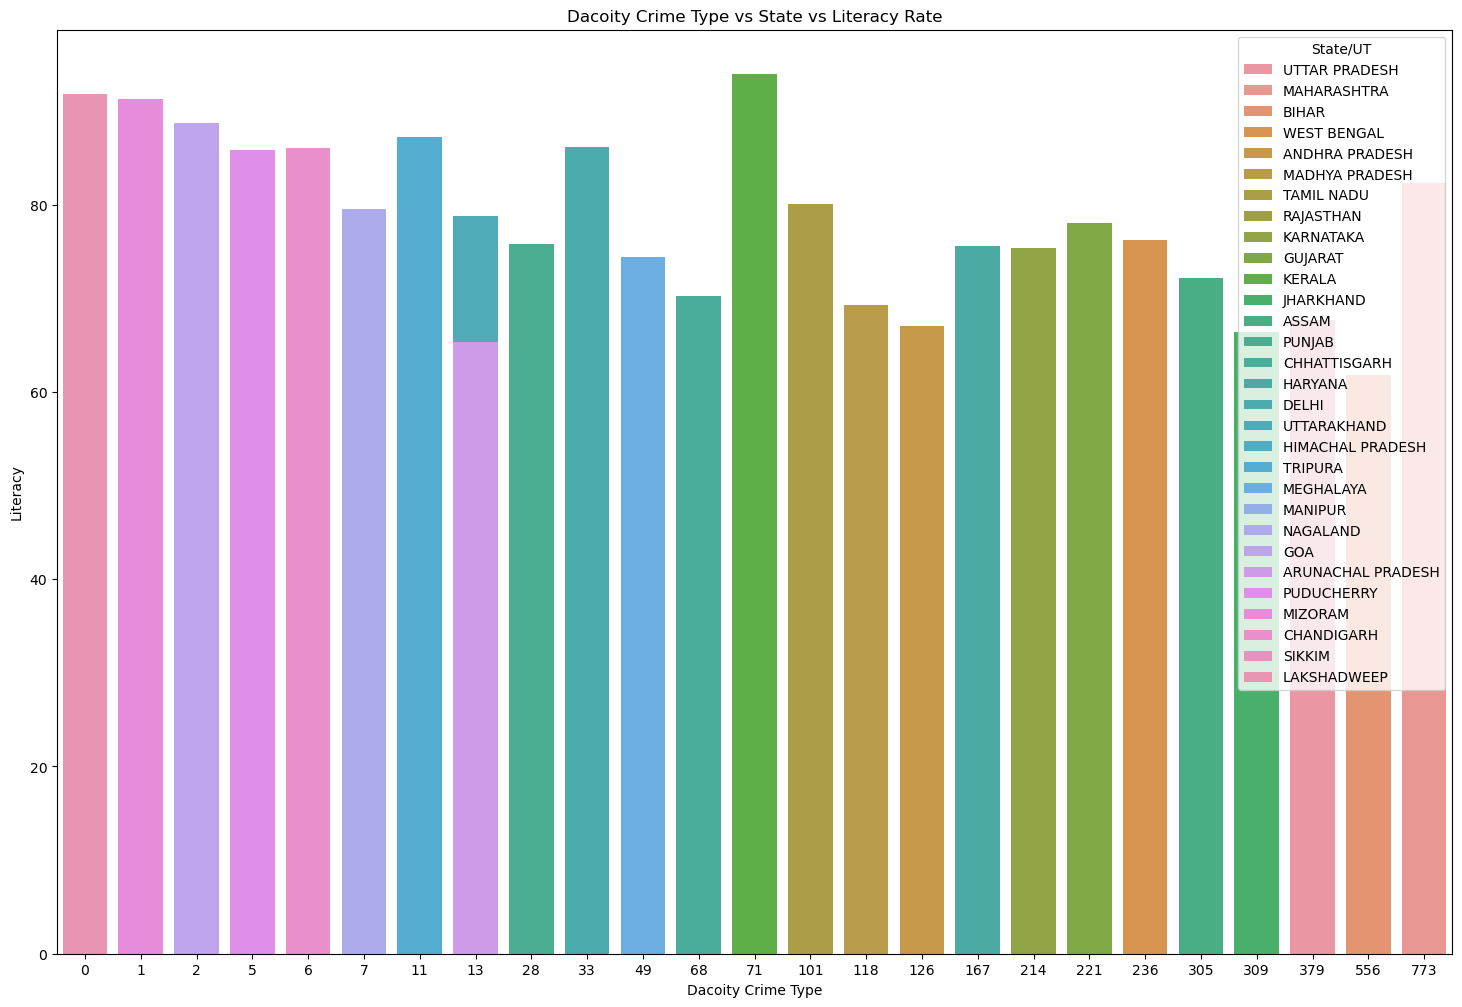

In [13]:
#Stacked bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='Dacoity', y='Literacy', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Dacoity Crime Type vs State vs Literacy Rate')
plt.xlabel('Dacoity Crime Type')
plt.ylabel('Literacy')
plt.show()


From the above graph we can analyse that states with higher literacy rate have less number of Dacoity while the states with low 
literacy rate have high number of Dacoity. The higher the literacy rate the less is the Dacoity involves the lower the 
literacy the higher is the Dacoity. The data implies that as literacy rates rise, there appears to be a corresponding 
decrease in the occurrence of Dacoity. This could be attributed to the positive impact of education on societal awareness,
community engagement, and overall socio-economic development. Educated communities are likely to be more informed about legal
consequences, more engaged in proactive crime prevention, and possess a better understanding of conflict resolution mechanisms.
To create a more nuanced understanding of these dynamics, further research should explore the interplay of various factors 
influencing crime rates. This may include socio-economic indicators, urbanization trends, and the efficacy of law enforcement 
measures in different regions.


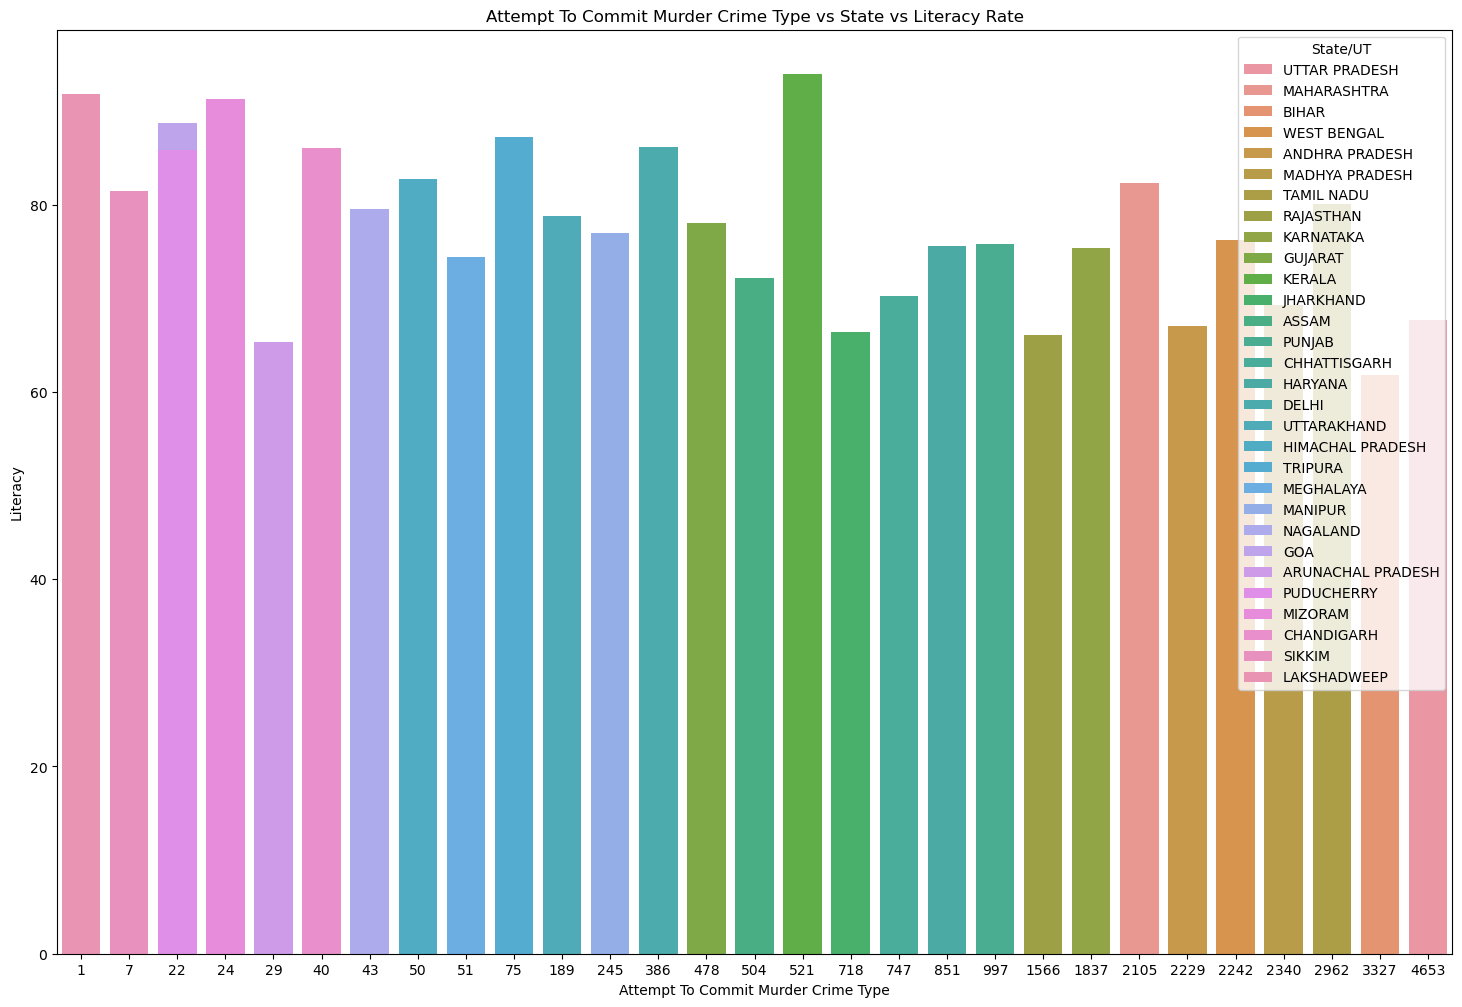

In [14]:
#Stacked bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='Attempt To Commit Murder', y='Literacy', hue='State/UT', data=crime_lite_data, dodge=False)
plt.title('Attempt To Commit Murder Crime Type vs State vs Literacy Rate')
plt.xlabel('Attempt To Commit Murder Crime Type')
plt.ylabel('Literacy')
plt.show()


From the above graph we can analyze that states like kerala with high literacy rate has less number of Attempt To Commit Murder 
involved while the states like maharashtra with high literacy rate contributes to high crime in Attempt To Commit Murder. 
Policy interventions should consider a multifaceted approach. While efforts to further enhance literacy rates are commendable,
they need to be complemented by initiatives addressing socio-economic inequalities and strengthening law enforcement measures.
Community engagement programs, aimed at promoting conflict resolution skills and fostering a culture of non-violence, can also
play a crucial role in mitigating attempted murder incidents.


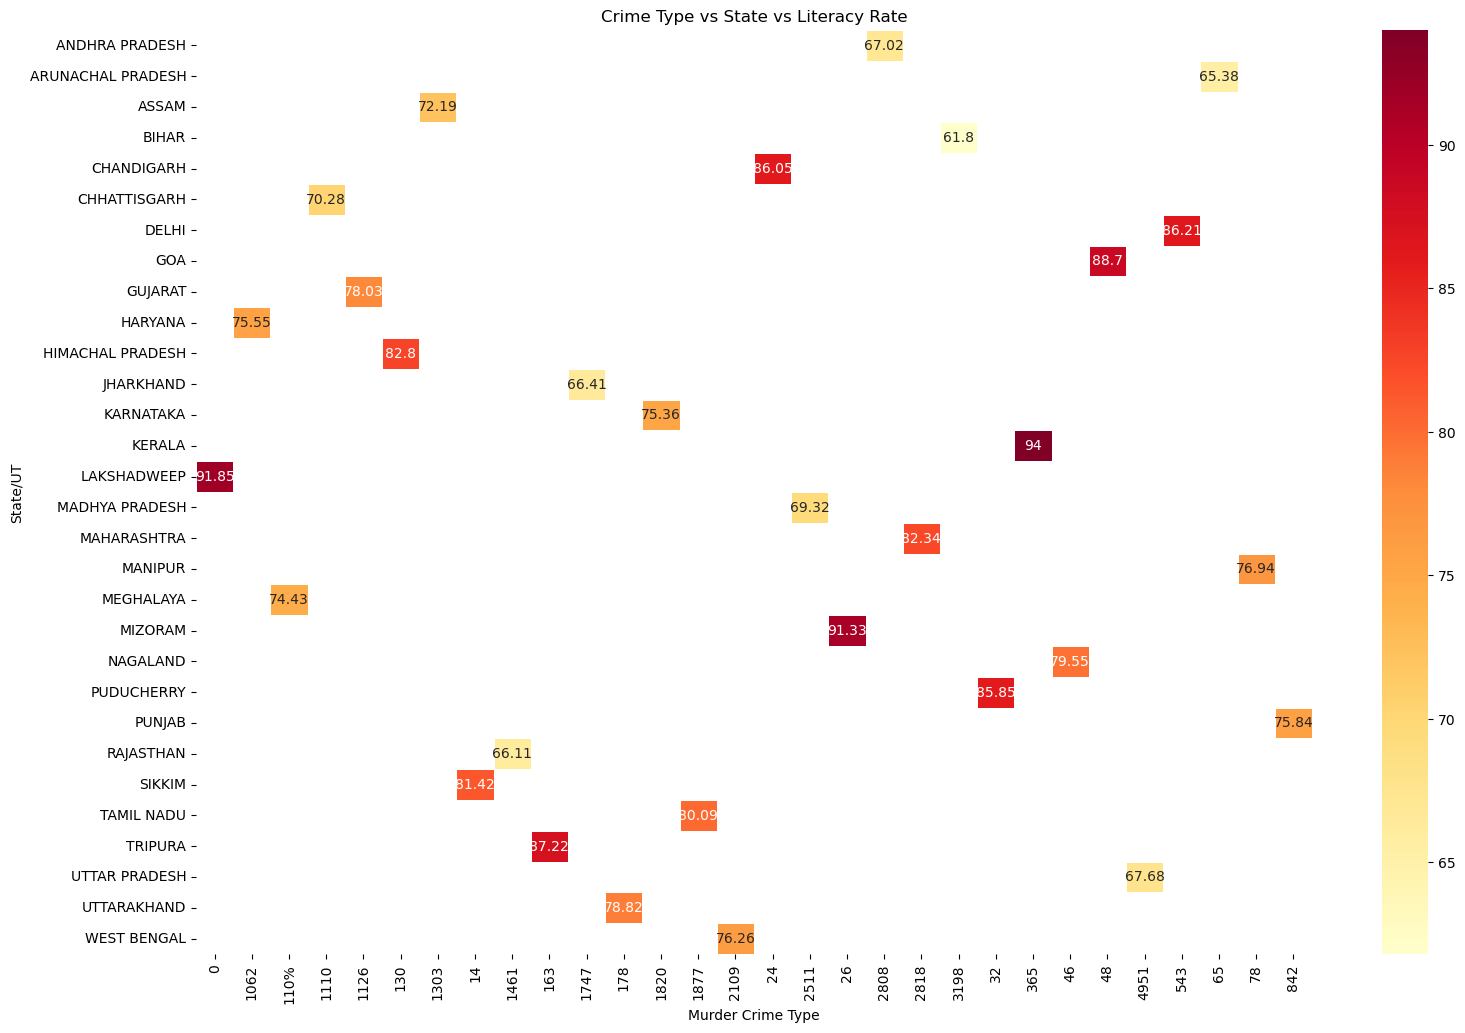

In [15]:
#heatmap

plt.figure(figsize=(18, 12))
crime_heatmap_data = crime_lite_data.pivot(index='State/UT', columns='Murder', values='Literacy')
sns.heatmap(crime_heatmap_data, cmap='YlOrRd', annot=True, fmt='g', linewidths=.5)
plt.title('Crime Type vs State vs Literacy Rate')
plt.xlabel('Murder Crime Type')
plt.ylabel('State/UT')
plt.show()


In [16]:
#  2.3 this is for year on year crime rate
data_years_crime = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/Datatrained_Academy-/main/Capstone_Project/year%20on%20year%20crime%20rate.csv')
data_years_crime.head()


,Year,Per 100K Population,Annual % Change in crime rate
0,2021,2.94,0.86%
1,2020,2.91,-0.53%
2,2019,2.93,-2.24%
3,2018,2.99,-1.16%
4,2017,3.03,-4.19%


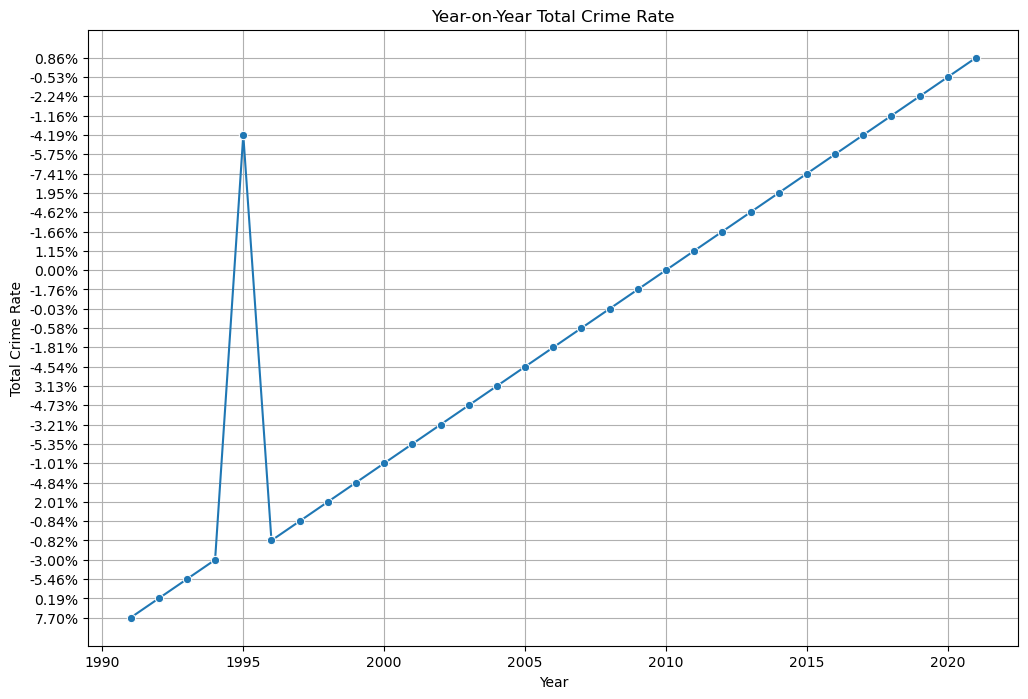

In [17]:
# 2.3 Analysis of year-on-year total crime rate
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Annual % Change in crime rate', data=data_years_crime, marker='o')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')
plt.grid(True)
plt.show()


From the above graph we can clearly analyse that years on years is directly proportional to crime rate. As the year is 
increasing the crime rate is also increasing. In 1990 the crime rate was around 7.70% but in 2021 it was around 0.86%.
The observed correlation invites a deeper exploration into the evolving societal context during this time span.
Understanding the interplay between historical events, economic shifts, legislative changes, and cultural transformations 
is crucial for interpreting the dynamics of the relationship between time and crime rates.
Law enforcement strategies play a pivotal role in shaping crime trends. An investigation into changes in policing 
methodologies, advancements in technology, and shifts in public policy may provide valuable insights into the observed 
temporal correlation.

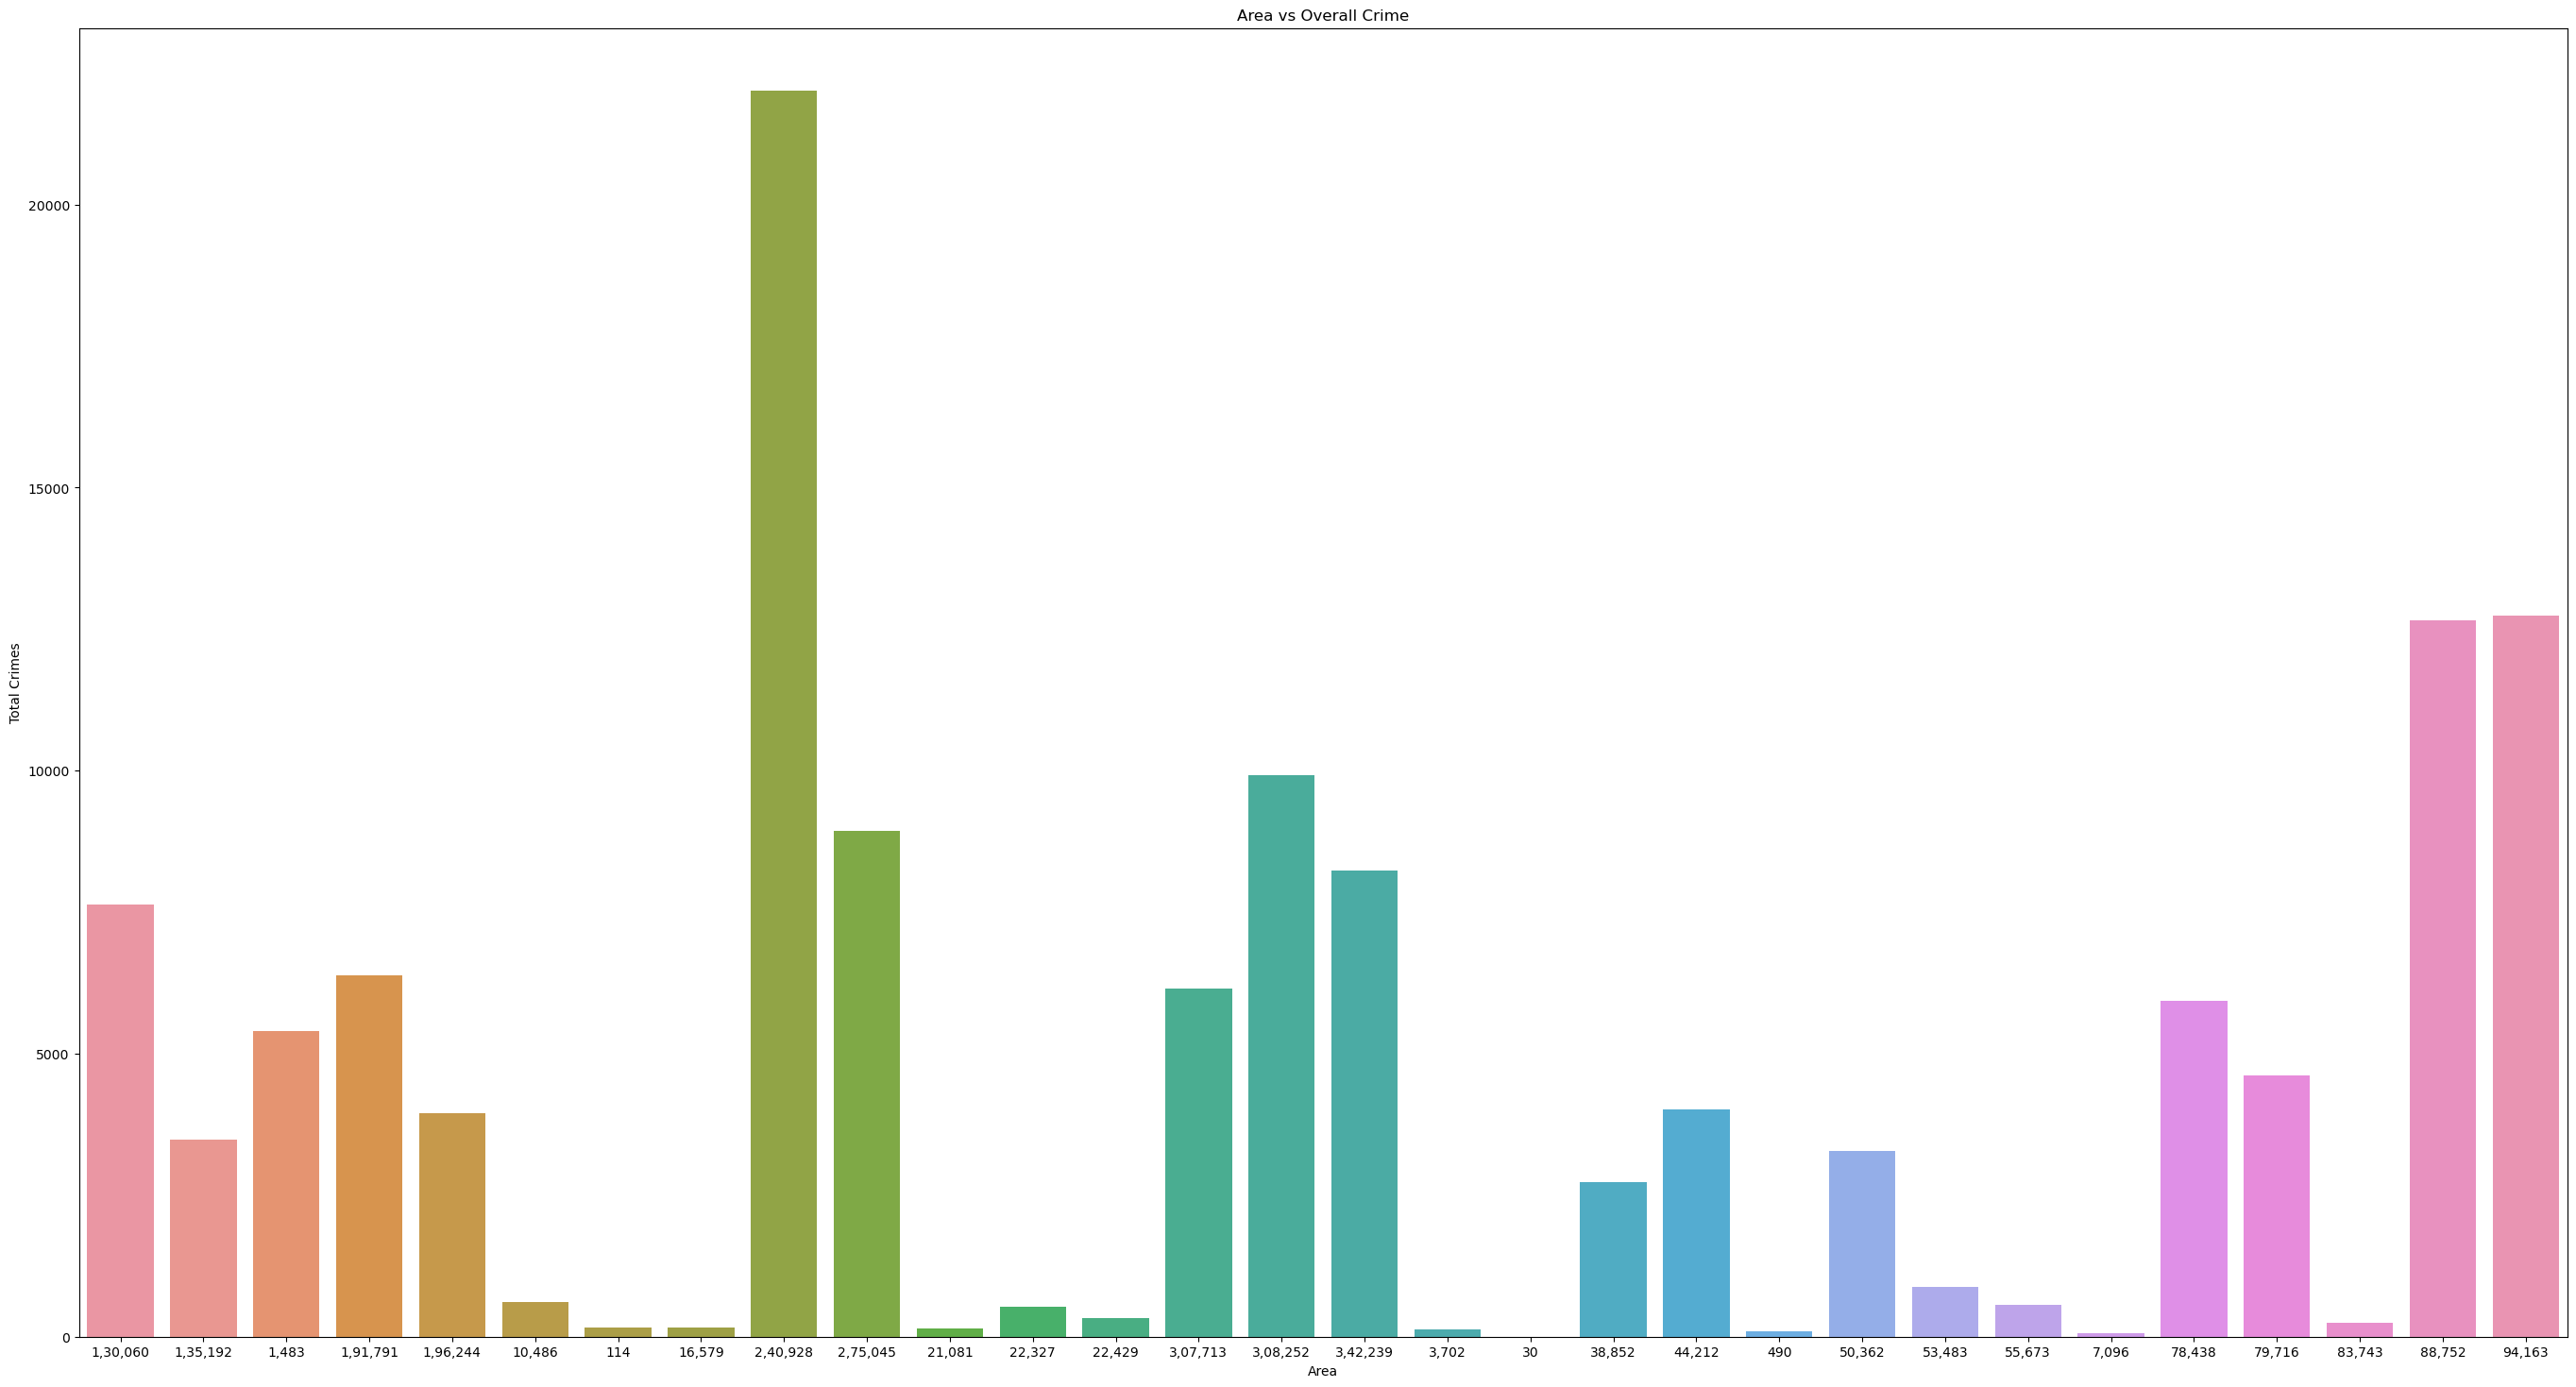

In [18]:
# 2.4 Analysis of area vs overall crime
plt.figure(figsize=(34, 18))
sns.barplot(x='Area(Km2)', y='Total Crime', data=crime_lite_data.groupby('Area(Km2)').sum().reset_index())
plt.title('Area vs Overall Crime')
plt.xlabel('Area')
plt.ylabel('Total Crimes')
plt.show()


From the above graph we can clearly see that the greater the area of the state greater is the crime rate. So area is directly 
proportional to crime rate.In conclusion, the assertion that state area is directly proportional to crime rate serves 
as a starting point for a deeper exploration. The correlation invites a nuanced analysis that considers demographic, economic, 
law enforcement, and cultural dimensions. Unraveling the intricate dynamics of the relationship between state size and crime
rates requires a comprehensive understanding of the multifaceted factors at play within the geographic context of each state.


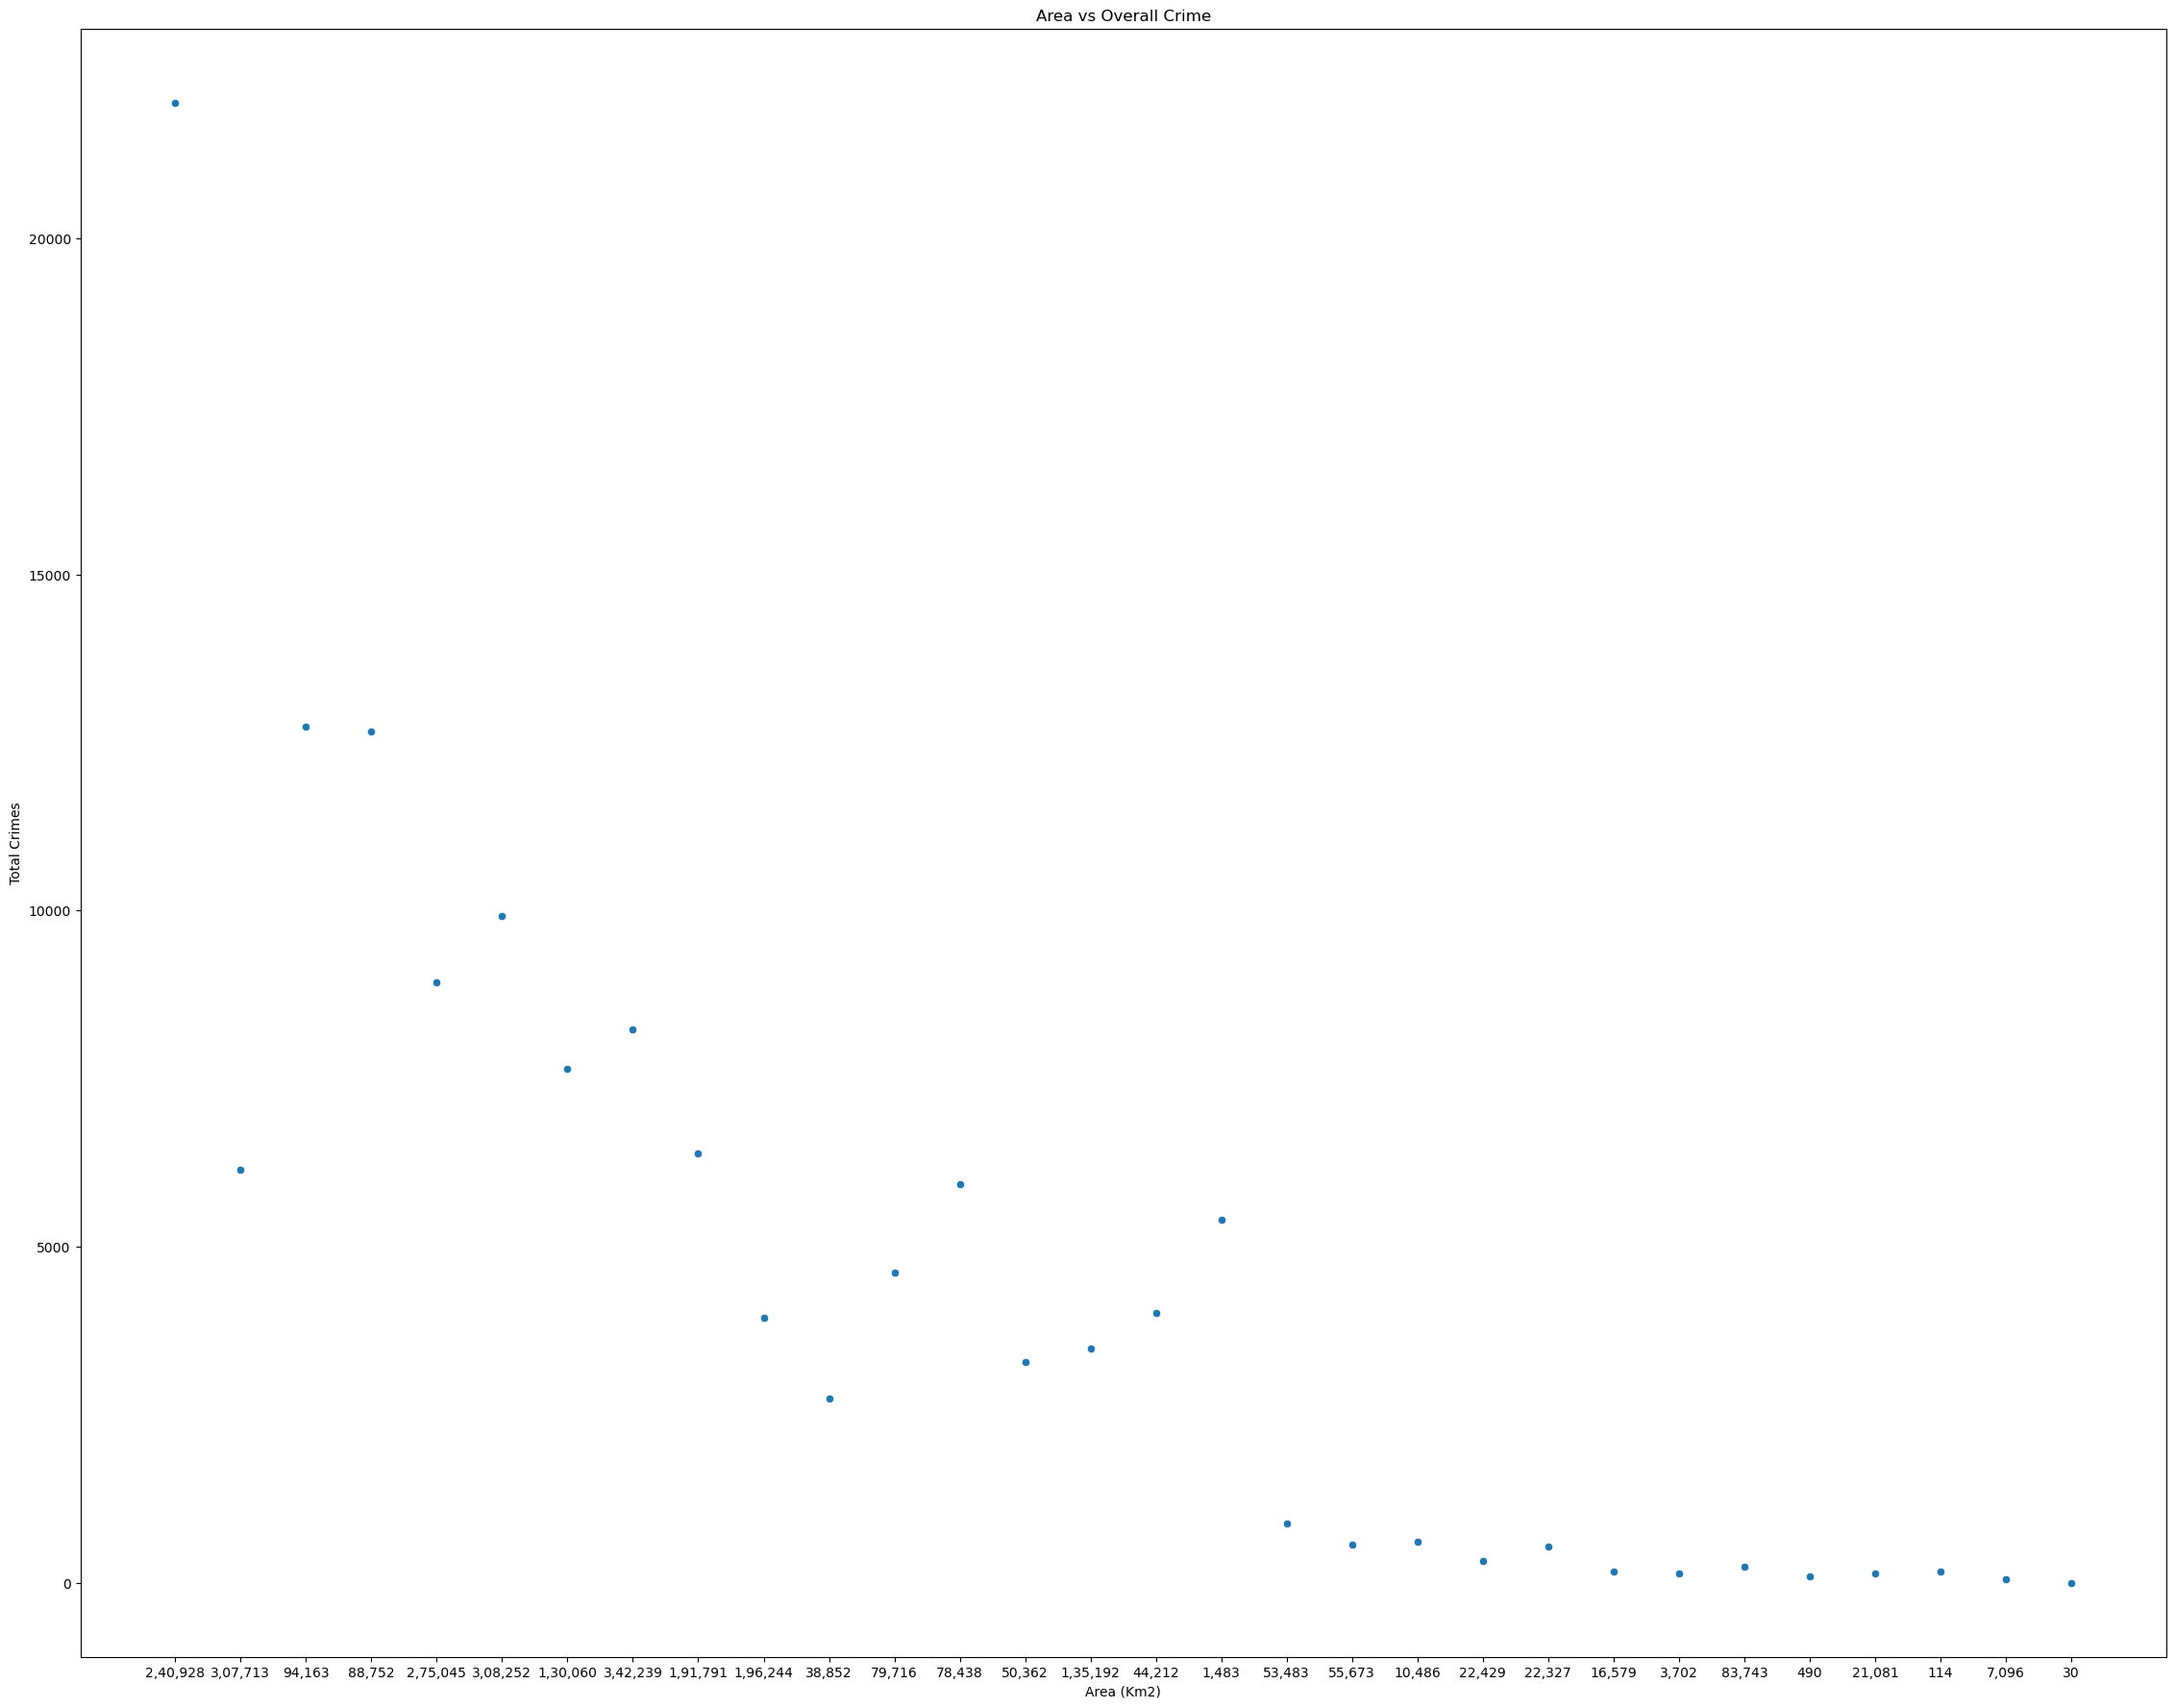

In [19]:
#scatter plot
plt.figure(figsize=(28, 22))
sns.scatterplot(x='Area(Km2)', y='Total Crime', data=crime_lite_data)
plt.title('Area vs Overall Crime')
plt.xlabel('Area (Km2)')
plt.ylabel('Total Crimes')
plt.show()


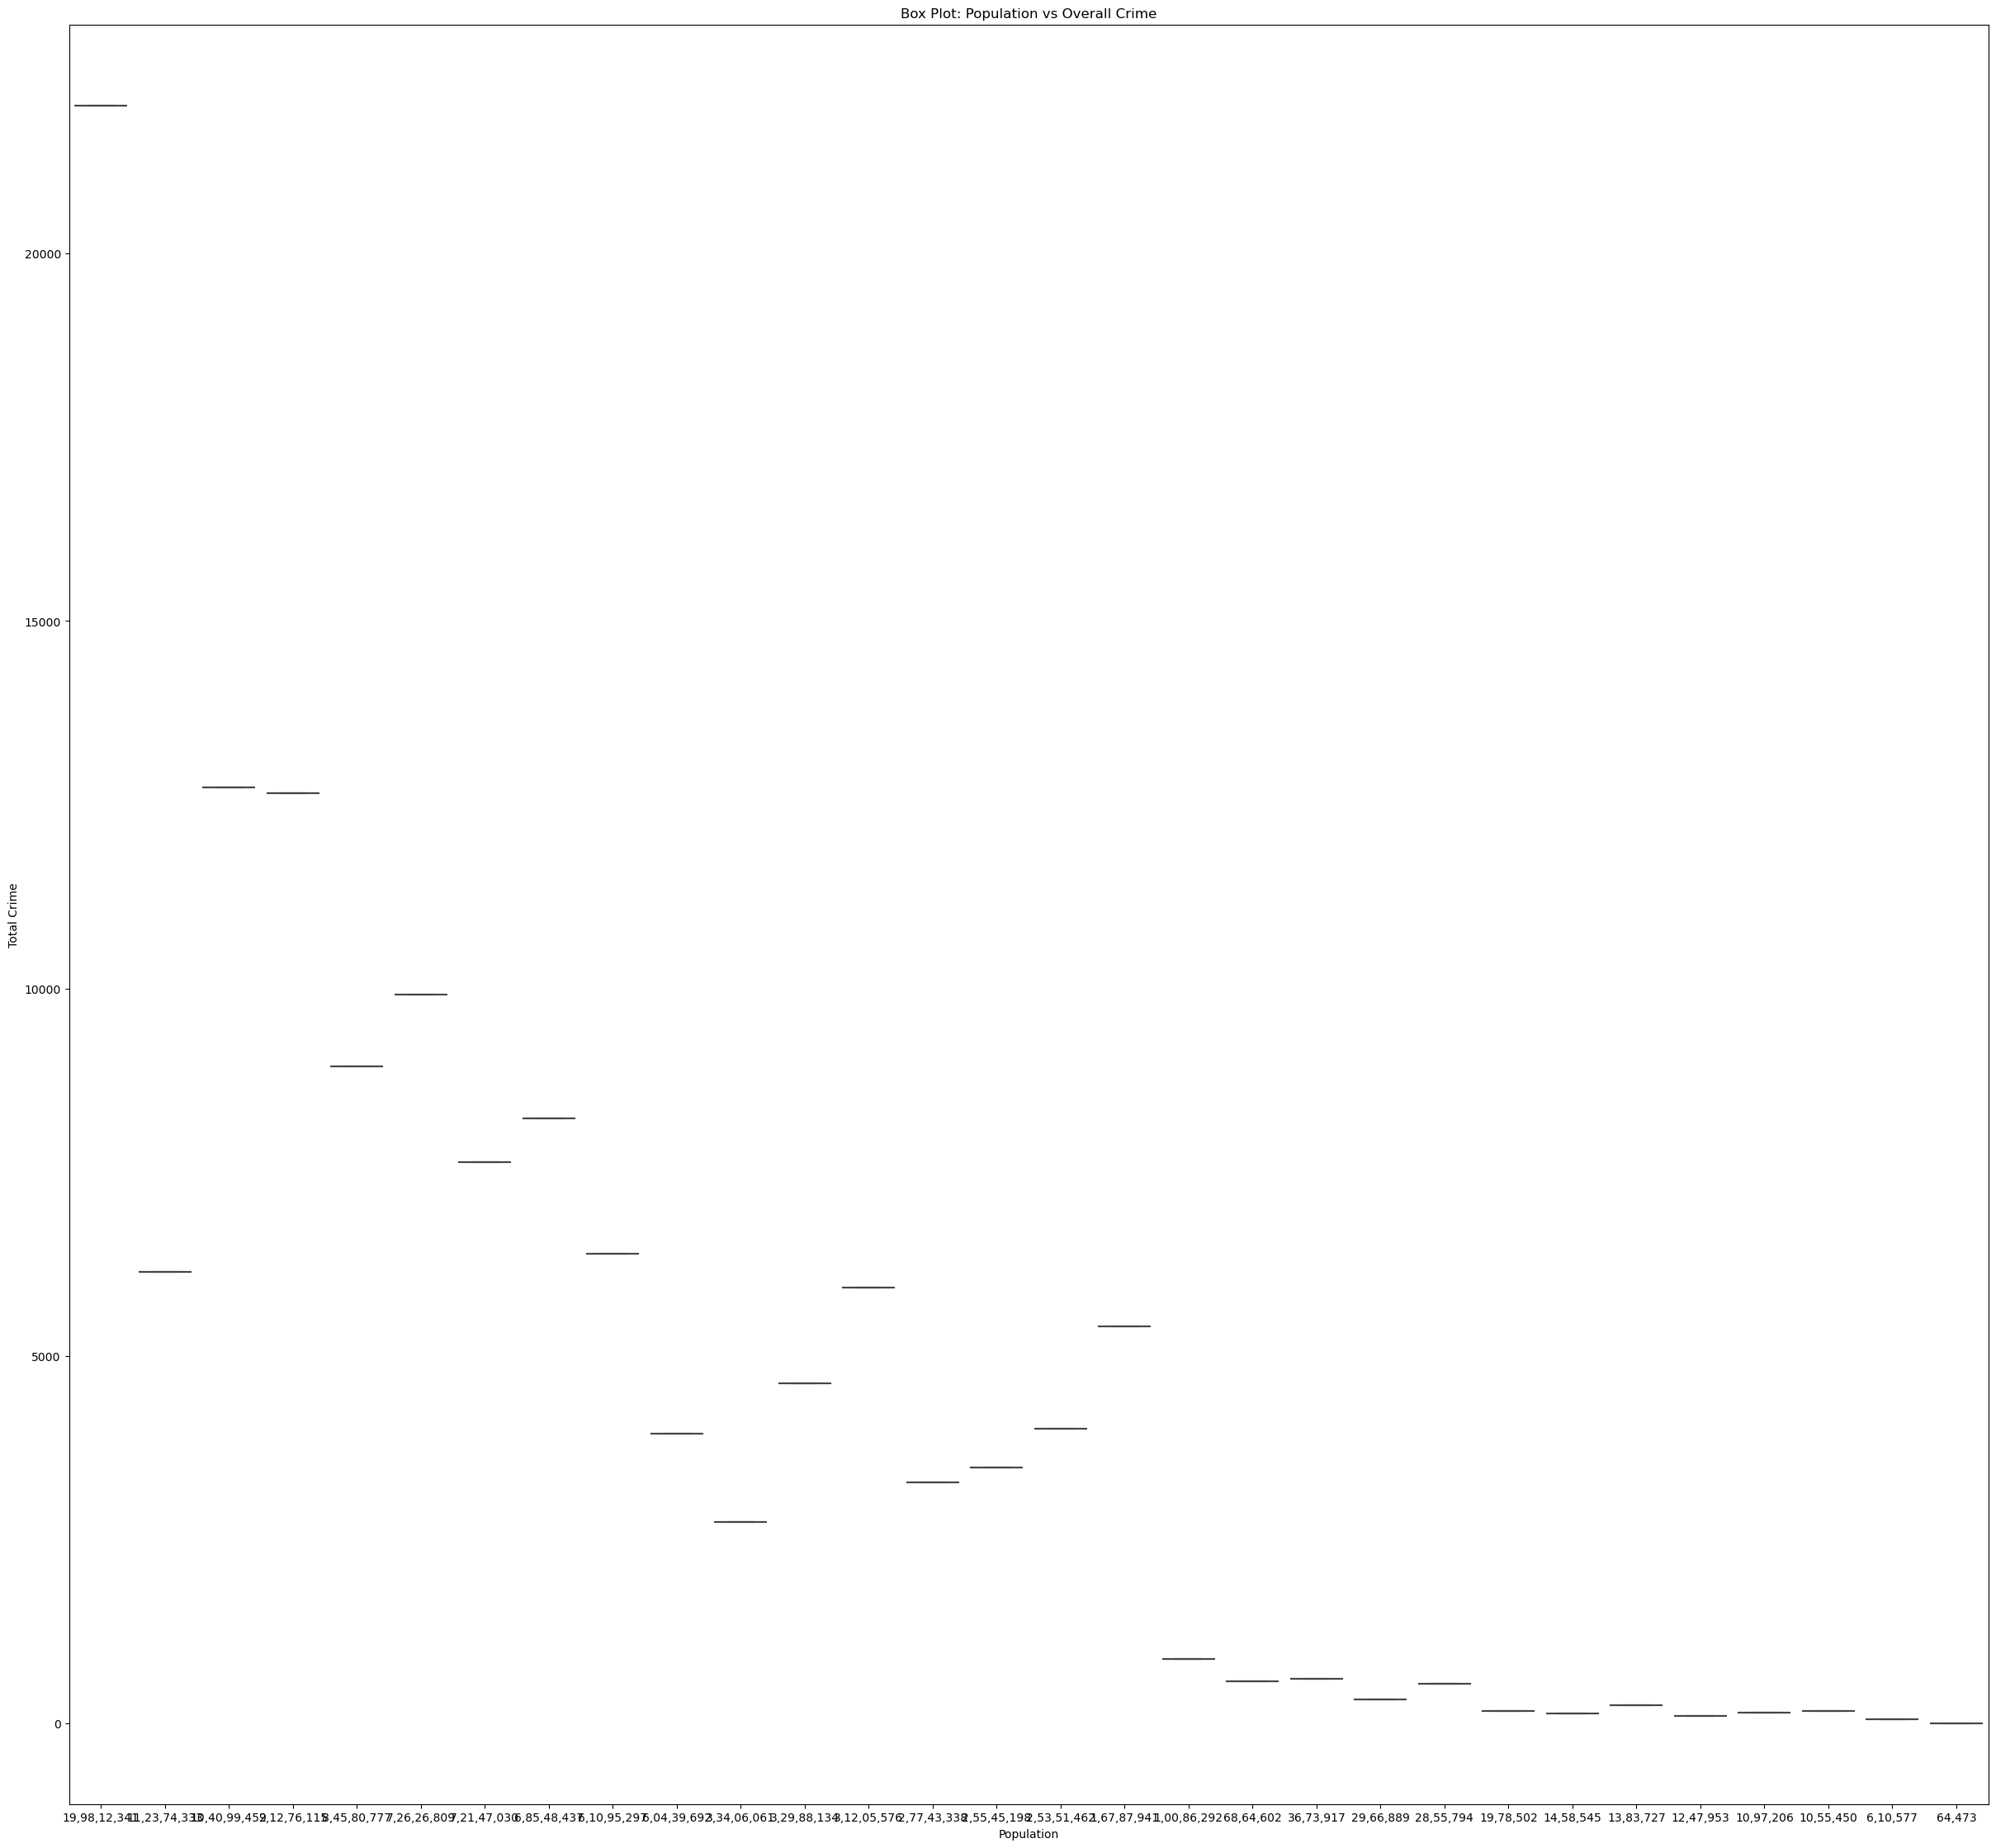

In [20]:
plt.figure(figsize=(30, 28))
sns.boxplot(x='Population', y='Total Crime', data=crime_lite_data)
plt.title('Box Plot: Population vs Overall Crime')
plt.show()


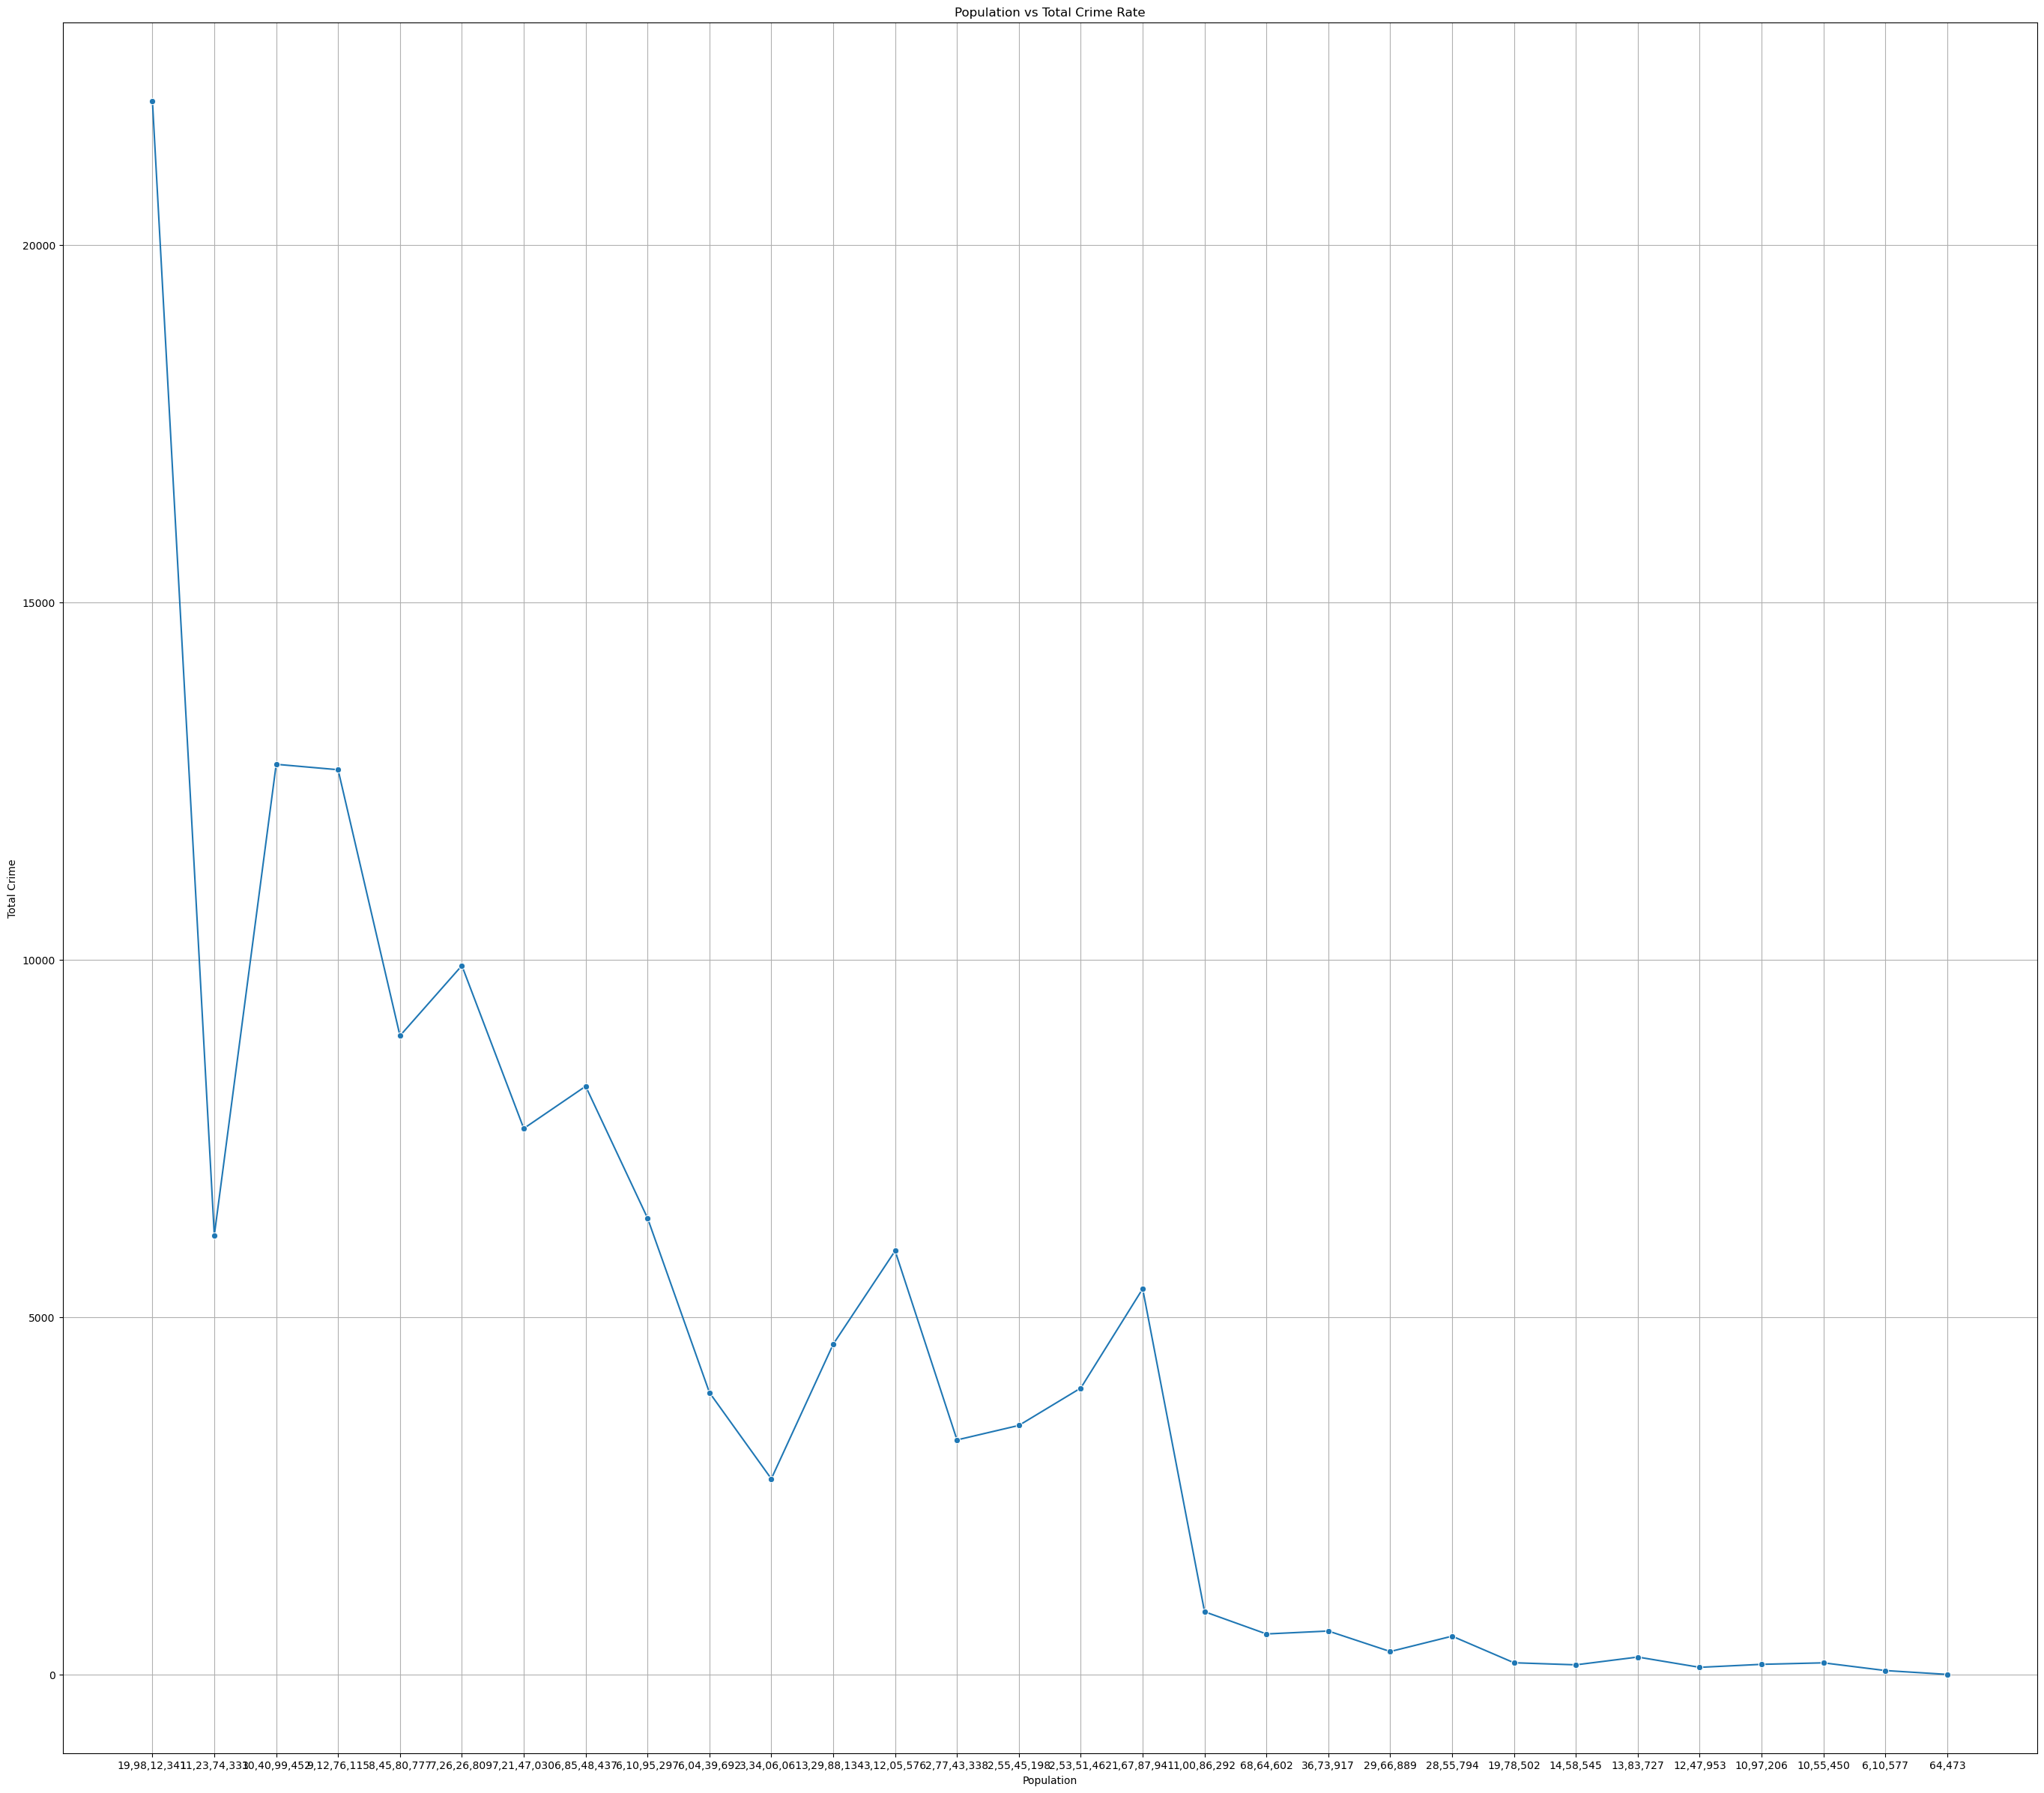

In [21]:
plt.figure(figsize=(34, 30))
sns.lineplot(x='Population', y='Total Crime', data=crime_lite_data, marker='o')
plt.title('Population vs Total Crime Rate')
plt.xlabel('Population')
plt.ylabel('Total Crime')
plt.grid(True)
plt.show()
